Average energy: -81.1284


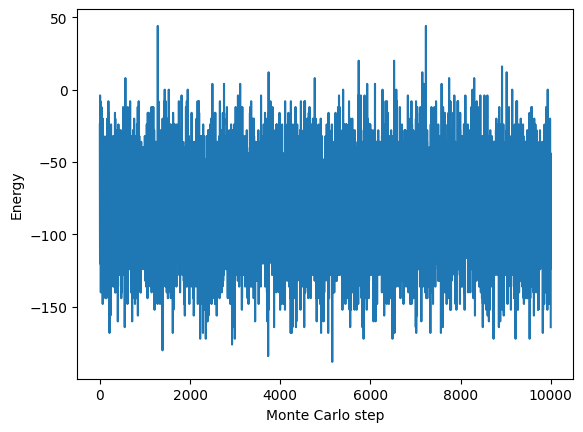

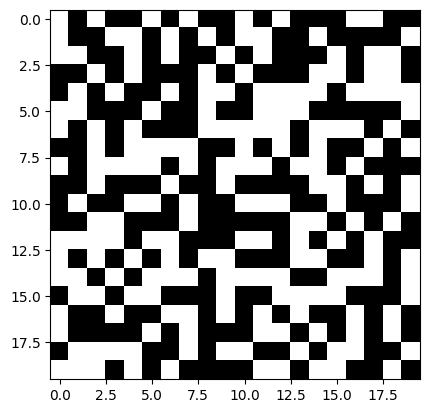

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
N = 20 # number of spins in each direction
J = -1 # coupling constant
beta = 0.1 # inverse temperature
nsteps = 10000 # number of Monte Carlo steps

# Initialize the spins randomly
spins = np.random.choice([-1, 1], size=(N, N))

# Define the energy function
def energy(spins):
    return -J * (np.sum(spins[:-1,:] * spins[1:,:]) + np.sum(spins[:,:-1] * spins[:,1:])) \
           - J * (np.sum(spins[0,:] * spins[-1,:]) + np.sum(spins[:,0] * spins[:,-1]))

# Define the Metropolis algorithm
def metropolis(spins, beta):
    for i in range(N):
        for j in range(N):
            # Choose a random spin to flip
            x, y = np.random.randint(0, N), np.random.randint(0, N)
            # Calculate the energy difference
            delta_E = 2 * J * spins[x, y] * \
                      (spins[(x+1)%N, y] + spins[(x-1)%N, y] + spins[x, (y+1)%N] + spins[x, (y-1)%N])
            # Flip the spin with probability according to the Boltzmann factor
            if np.random.uniform(0, 1) < np.exp(-beta * delta_E):
                spins[x, y] = -spins[x, y]
    return spins

# Run the Monte Carlo simulation
energies = []
for i in range(nsteps):
    spins = metropolis(spins, beta)
    energies.append(energy(spins))

# Calculate the average energy
E = np.mean(energies)

# Print the result
print(f"Average energy: {E:.4f}")

# Plot the energy as a function of Monte Carlo steps
plt.plot(energies)
plt.xlabel("Monte Carlo step")
plt.ylabel("Energy")
plt.show()

# Plot the spin configuration
plt.imshow(spins, cmap='binary')
plt.show()

Average energy: -23.8855


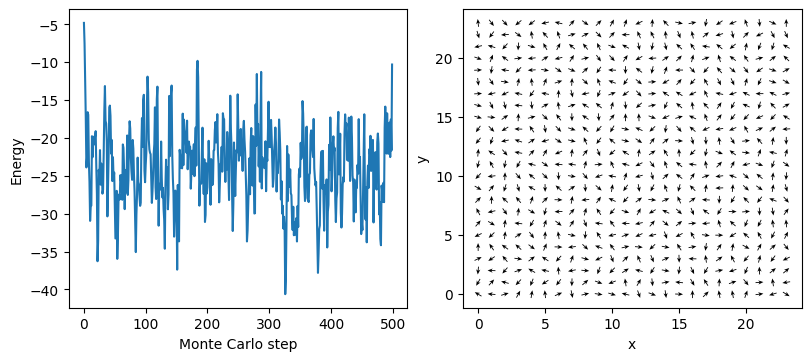

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
N = 24  # number of spins in each direction
J = 0.1  # coupling constant
T = 1  # temperature
nsteps = 500  # number of Monte Carlo steps

# Initialize the angles randomly
angles = np.random.uniform(0, 2*np.pi, size=(N, N))

# Define the energy function
def energy(angles):
    cos_diff = np.cos(angles - np.roll(angles, 1, axis=0)) + np.cos(angles - np.roll(angles, -1, axis=0)) \
               + np.cos(angles - np.roll(angles, 1, axis=1)) + np.cos(angles - np.roll(angles, -1, axis=1))
    return -J * np.sum(cos_diff)

# Define the Metropolis algorithm
def metropolis(angles, T):
    for i in range(N):
        for j in range(N):
            # Choose a random angle to update
            x, y = np.random.randint(0, N), np.random.randint(0, N)
            # Calculate the energy difference
            old_energy = energy(angles)
            new_angles = np.copy(angles)
            new_angles[x, y] = (np.random.uniform(0, 2*np.pi*0.25) + angles[x, y]) % (2*np.pi)
            new_energy = energy(new_angles)
            delta_E = new_energy - old_energy
            # Rotate the angle with probability according to the Boltzmann factor
            if delta_E < 0 or np.random.uniform(0, 1) < np.exp(-delta_E / T):
                angles = np.copy(new_angles)
    return angles

# Run the Monte Carlo simulation
energies = []
for i in range(nsteps):
    angles = metropolis(angles, T)
    energies.append(energy(angles))

# Calculate the average energy
E = np.mean(energies)

# Print the result
print(f"Average energy: {E:.4f}")

# Plot the energy as a function of Monte Carlo steps
fig, axs = plt.subplots(1, 2, figsize=(8, 3.5), layout='constrained')
plt.sca(axs[0])
plt.plot(energies)
plt.xlabel("Monte Carlo step")
plt.ylabel("Energy")
# plt.show()

# Plot the spin configuration
plt.sca(axs[1])
x, y = np.meshgrid(range(N), range(N))
plt.quiver(x, y, np.cos(angles), np.sin(angles), pivot='mid', headwidth=5, headlength=6)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

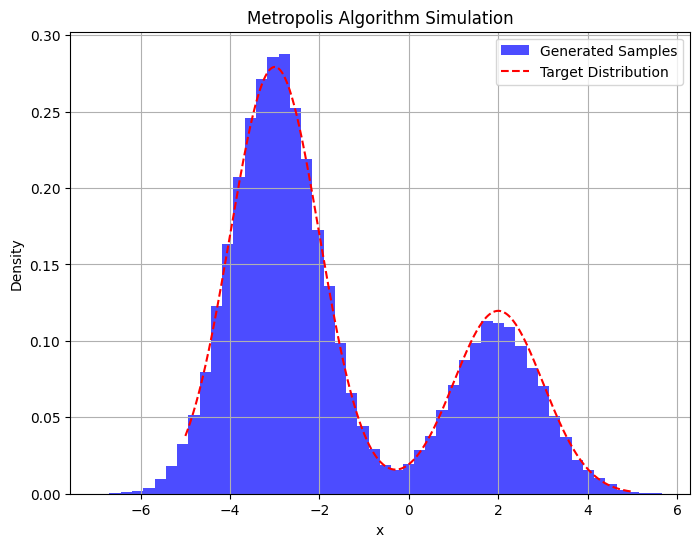

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def target_distribution(x):
    """目标分布函数"""
    return 0.7*(1/np.sqrt(2*np.pi) * np.exp(-0.5 * (x + 3)**2))+ 0.3*(1/np.sqrt(2*np.pi) * np.exp(-0.5 * (x - 2)**2))

def proposal_distribution(x):
    """提议分布函数，这里选择简单的标准正态分布"""
    return np.random.normal(x, 1)

def metropolis_algorithm(num_samples, initial_state):
    samples = [initial_state]
    current_state = initial_state
    for _ in range(num_samples):
        proposed_state = proposal_distribution(current_state)
        acceptance_prob = min(1, target_distribution(proposed_state) / target_distribution(current_state))
        if np.random.rand() < acceptance_prob:
            current_state = proposed_state
        samples.append(current_state)
    return np.array(samples)

# 设置随机数种子以确保结果可重复
np.random.seed(42)

# 运行Metropolis算法以生成样本
num_samples = 100000
initial_state = np.random.randn()
samples = metropolis_algorithm(num_samples, initial_state)

# 绘制生成的样本分布
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=50, density=True, alpha=0.7, color='blue', label='Generated Samples')
x = np.linspace(-5, 5, 1000)
plt.plot(x, target_distribution(x), color='red', linestyle='--', label='Target Distribution')
plt.title('Metropolis Algorithm Simulation')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import tensorflow